In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Find employee gender distribution from employees table

In [24]:
employees_df = pd.read_sql_table("employee", "mysql+pymysql://root:@127.0.0.1:3306/kuzzy_noble_db_final")
employees_df.head()

,id,employee_id,title,name,gender,date_of_birth,nationality,phone_number,email_address,department_id,branch_id,role_id,created_at,updated_at
0,1,EMP001,Dr.,John Smith,Male,1980-01-15,American,+123456789,johnsmith@example.com,1,1,1,2024-04-20 23:33:47,2024-04-20 23:33:47
1,2,EMP002,Nurse,Emily Johnson,Female,1985-05-20,Canadian,+987654321,emilyjohnson@example.com,2,2,2,2024-04-20 23:33:47,2024-04-20 23:33:47
2,3,EMP003,Technician,Michael Williams,Male,1990-08-10,British,+1122334455,michaelwilliams@example.com,3,3,3,2024-04-20 23:33:47,2024-04-20 23:33:47
3,4,EMP004,Mrs.,Anita Boateng,Female,2001-12-23,Ghanaian,+233122334455,anitaboateng@example.com,4,4,4,2024-04-20 23:33:47,2024-04-20 23:33:47
4,5,EMP005,Rev.,Cristus Pontus,Male,1950-01-02,Spanish,+45122334455,cristus@example.com,5,5,5,2024-04-20 23:33:47,2024-04-20 23:33:47


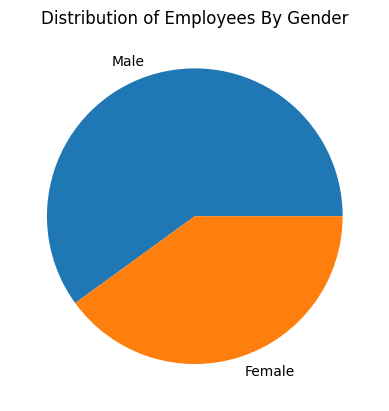

In [27]:
gender_distribution = employees_df["gender"].value_counts()

plt.title("Distribution of Employees By Gender")
plt.pie(x=gender_distribution.values, labels=gender_distribution.index)
plt.savefig("employee-gender-distribution.png")

### Find revenue per patient from medical reports data

In [19]:
medical_reports_df = pd.read_sql_table("medical_report", "mysql+pymysql://root:@127.0.0.1:3306/kuzzy_noble_db_final")
medical_reports_df.head()

,id,report_code,patient_id,sample_id,test_id,specimen,price,created_by,result,result_unit,comment,is_done,is_quality_checked,is_signed,signed_by,created_at,updated_at
0,1,MR001,1,None,1,None,50.0,1,12.5,mg/dL,Normal range,0,0,0,None,2024-04-20 23:33:47,2024-04-20 23:33:47
1,2,MR002,2,None,2,None,100.0,2,20.0,mg/dL,Above normal range,0,0,0,None,2024-04-20 23:33:47,2024-04-20 23:33:47
2,3,MR003,3,None,3,None,450.0,2,1000.0,U/mL,Above normal range,0,0,0,None,2024-05-20 23:33:47,2024-04-21 00:13:30
3,4,MR004,4,None,4,None,150.0,2,57.0,U/mL,Normal range,0,0,0,None,2024-04-20 23:33:47,2024-04-20 23:33:47
4,5,MR005,5,None,5,None,300.0,3,5.0,Tesla,Successful scan,0,0,0,None,2024-06-20 23:33:47,2024-04-21 00:13:37


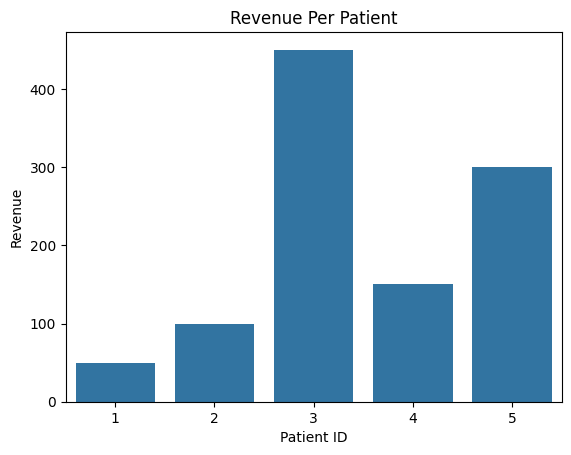

In [26]:
plt.title("Revenue Per Patient")
plt.xlabel("Patient ID")
plt.ylabel("Revenue")
sb.barplot(data=medical_reports_df, x="patient_id", y="price", estimator="sum")
plt.savefig("revenue-per-patient.png")

### Find the distribution of test turnaround times

In [28]:
tests_df = pd.read_sql_table("test", "mysql+pymysql://root:@127.0.0.1:3306/kuzzy_noble_db_final")
tests_df.head()

,id,name,abbreviation,test_category_id,price,turnaround_time_in_hours,unit,consultants,created_at,updated_at
0,1,Complete Blood Count,CBC,1,50.0,24,cells/mm3,Prof. Allan Smith,2024-04-20 23:33:47,2024-04-20 23:33:47
1,2,X-Ray Imaging,XRI,2,100.0,48,X-Ray Technician,Prof. Allan Smith,2024-04-20 23:33:47,2024-04-20 23:33:47
2,3,Human Immunodeficiency Virus,HIV,3,450.0,24,U/mL,Prof. Allan Smith,2024-04-20 23:33:47,2024-04-20 23:33:47
3,4,Human Papilloma Virus,HPV,4,150.0,24,U/mL,Prof. Allan Smith,2024-04-20 23:33:47,2024-04-20 23:33:47
4,5,MRI Scan,MRI,5,300.0,72,Tesla,Prof. Allan Smith,2024-04-20 23:33:47,2024-04-20 23:33:47


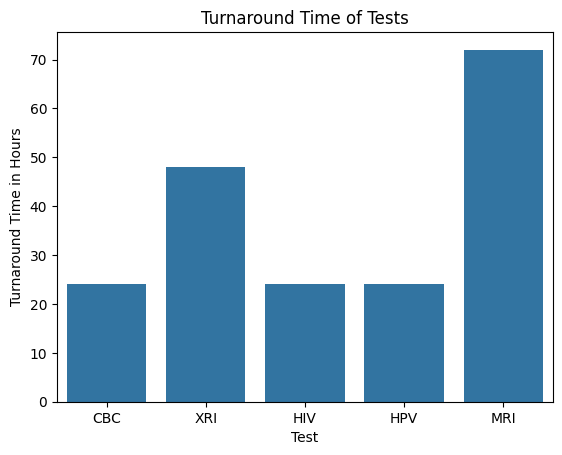

In [29]:
plt.title("Turnaround Time of Tests")
plt.xlabel("Test")
plt.ylabel("Turnaround Time in Hours")
sb.barplot(data=tests_df, x="abbreviation", y="turnaround_time_in_hours")
plt.savefig("turnaround-time-of-tests.png")